In [1]:
print("This is for Jack's rough code")

This is for Jack's rough code


In [3]:
#libraries
import os
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
#import data
os.chdir("..")
data = pd.read_csv("data/bikedata.csv")
data.head()

In [ ]:
#Parse dates and times
data.TIME = pd.to_datetime(data.TIME, format = "%Y-%m-%d %H:%M:%S")
data["DATE"] = pd.DatetimeIndex(data.TIME.dt.date)
data.head()
#Calculate bike usage
data["BIKE.USAGE"] = data["AVAILABLE.BIKE.STANDS"]/data["BIKE.STANDS"]
data.head()

In [7]:
dataCP = data[data.NAME == "CHARLEMONT PLACE"]
dataSG = data[data.NAME == "ST. STEPHEN'S GREEN EAST"]
dataPR = data[data.NAME == "PHIBSBOROUGH ROAD"]
print(len(dataCP))
print(len(dataSG))
print(len(dataPR))


343469
342867
342924


In [24]:
CP_daily_avg = dataCP.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
CP_date_vector = pd.DatetimeIndex(dataCP["DATE"].dt.date)

PR_daily_avg = dataPR.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
PR_date_vector = pd.DatetimeIndex(dataPR["DATE"].dt.date)

SG_daily_avg = dataSG.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
SG_date_vector = pd.DatetimeIndex(dataSG["DATE"].dt.date)

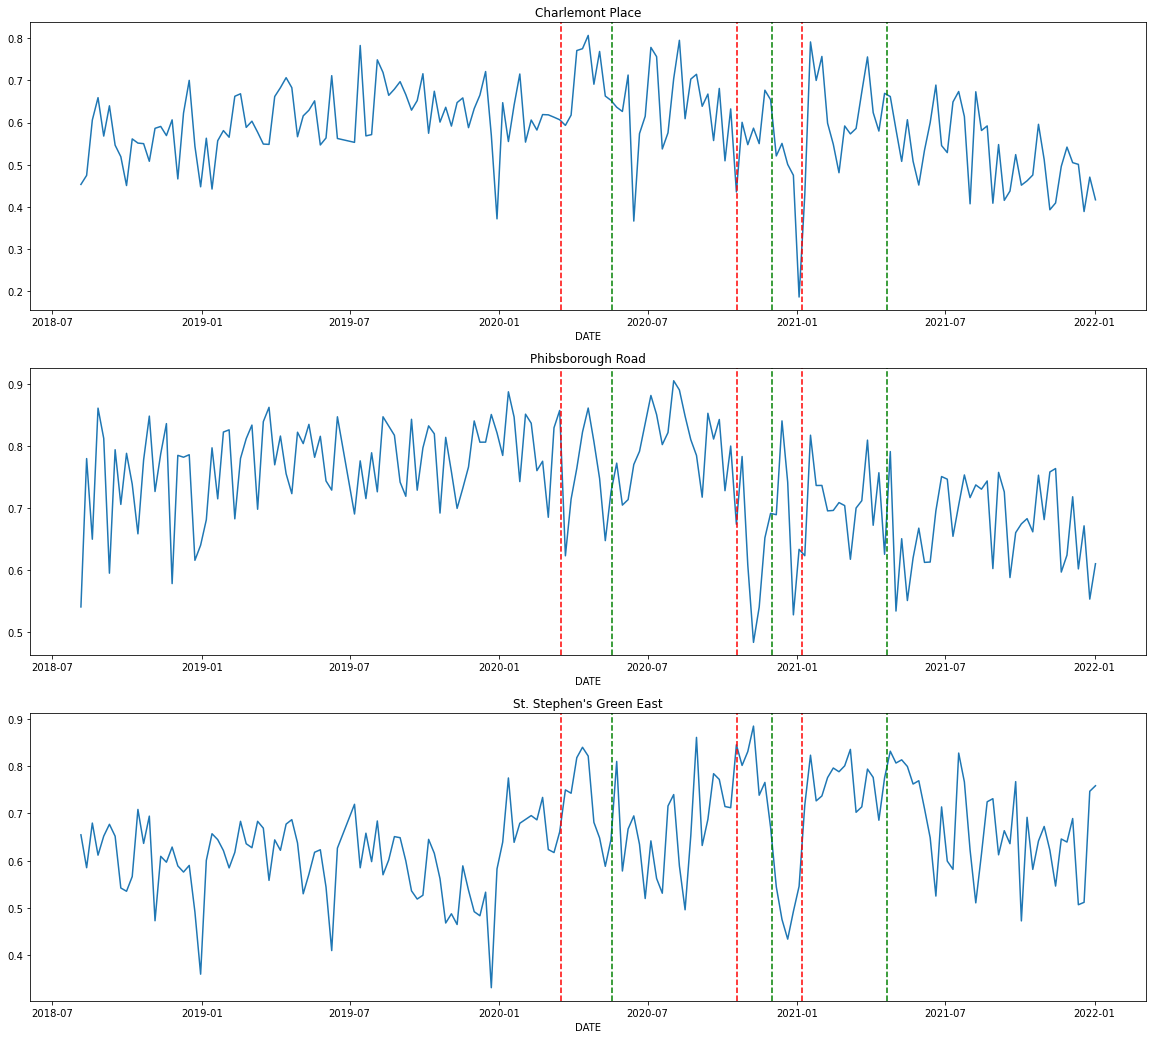

In [45]:
#datavis
usageFig, axes = plt.subplots(3, 1, figsize=(20,18))
sns.lineplot(ax=axes[0],x = CP_daily_avg.index, y = CP_daily_avg.values)
axes[0].set_title('Charlemont Place')
axes[0].axvline(pd.to_datetime('2020-03-17'), color='red', linestyle='--')
axes[0].axvline(pd.to_datetime('2020-05-18'), color='green', linestyle='--')
axes[0].axvline(pd.to_datetime('2020-10-19'), color='red', linestyle='--')
axes[0].axvline(pd.to_datetime('2020-12-01'), color='green', linestyle='--')
axes[0].axvline(pd.to_datetime('2021-01-06'), color='red', linestyle='--')
axes[0].axvline(pd.to_datetime('2021-04-21'), color='green', linestyle='--')
sns.lineplot(ax=axes[1],x = PR_daily_avg.index, y = PR_daily_avg.values)
axes[1].set_title('Phibsborough Road')
axes[1].axvline(pd.to_datetime('2020-03-17'), color='red', linestyle='--')
axes[1].axvline(pd.to_datetime('2020-05-18'), color='green', linestyle='--')
axes[1].axvline(pd.to_datetime('2020-10-19'), color='red', linestyle='--')
axes[1].axvline(pd.to_datetime('2020-12-01'), color='green', linestyle='--')
axes[1].axvline(pd.to_datetime('2021-01-06'), color='red', linestyle='--')
axes[1].axvline(pd.to_datetime('2021-04-21'), color='green', linestyle='--')
sns.lineplot(ax=axes[2],x = SG_daily_avg.index, y = SG_daily_avg.values)
axes[2].set_title("St. Stephen's Green East")
axes[2].axvline(pd.to_datetime('2020-03-17'), color='red', linestyle='--')
axes[2].axvline(pd.to_datetime('2020-05-18'), color='green', linestyle='--')
axes[2].axvline(pd.to_datetime('2020-10-19'), color='red', linestyle='--')
axes[2].axvline(pd.to_datetime('2020-12-01'), color='green', linestyle='--')
axes[2].axvline(pd.to_datetime('2021-01-06'), color='red', linestyle='--')
axes[2].axvline(pd.to_datetime('2021-04-21'), color='green', linestyle='--')


<AxesSubplot:xlabel='LATITUDE', ylabel='LONGITUDE'>

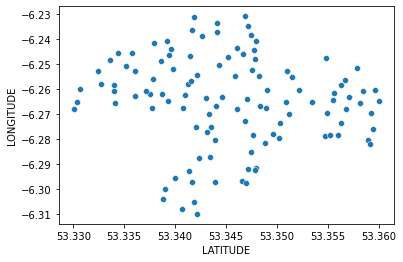

In [47]:
stations = pd.read_csv("data/stations.csv")
stations.head()

sns.scatterplot(x = 'LATITUDE', y = 'LONGITUDE', data = stations)